In [5]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline 

Size : (1080, 1920, 4)


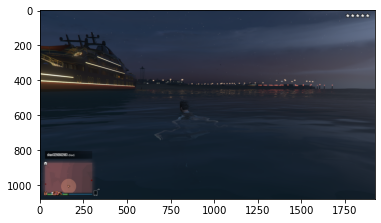

In [6]:
#read image
imp = imageio.imread("./abcd.jpg")
print("Size : {}".format(imp.shape))
plt.imshow(imp)

(1080, 1920)


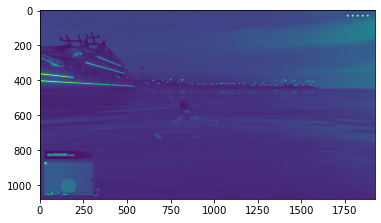

In [7]:
im_red = imp[:,:,1]
print(im_red.shape)
plt.imshow(im_red)

(1080, 1920)


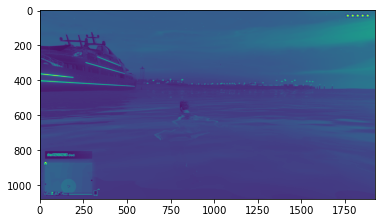

In [8]:
im_red = imp[:,:,2]
print(im_red.shape)
plt.imshow(im_red)

(1080, 1920)


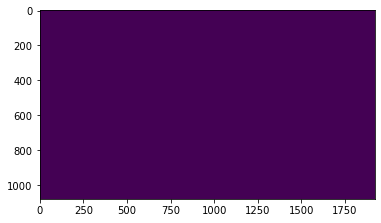

In [9]:
im_red = imp[:,:,3]
print(im_red.shape)
plt.imshow(im_red)

(1080, 1920)


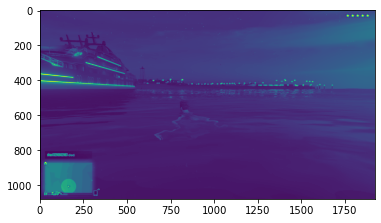

In [10]:
im_red = imp[:,:,0]
print(im_red.shape)
plt.imshow(im_red)

In [11]:
import numpy as np
import torch
import torch.nn.functional as F

In [12]:
x_fc = torch.rand(100,784)
W = torch.rand(784,10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10,requires_grad=True)
y_preact = torch.matmul(x_fc,W)+b
y = F.relu(y_preact)
print("Input shape:{}".format(x_fc.shape))
print("Output shape:{}".format(y.shape))

Input shape:torch.Size([100, 784])
Output shape:torch.Size([100, 10])


In [13]:
x_cnn = torch.randn(100,1,28,28);
W1 = torch.randn(16,1,3,3)/np.sqrt(1*3*3)
b1 = torch.zeros(16,requires_grad=True)

conv1_preact = F.conv2d(x_cnn,W1,b1,stride=1,padding=1)
conv1 = F.relu(conv1_preact)
print(conv1.shape)
# print(b1.shape)
# print(x_cnn)

torch.Size([100, 16, 28, 28])


In [14]:
import torch.nn as nn

class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        
        # fc layer 1
        x = x.view(-1, 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        
        # fc layer 2
        x = self.fc2(x)
        return x        

In [15]:
model = MNIST_CNN()
print(model)

MNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model  
model = MNIST_CNN()  # <---- change here

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # <---- change here

# Iterate through train set minibatchs 
for epoch in trange(1):  # <---- change here
    for images, labels in tqdm(train_loader):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        x = images
#         print(images.shape)# <---- change here 
        y = model(x)
        loss = criterion(y, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images # <---- change here 
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
print(correct)
print(total)
print('Test accuracy: {}'.format(correct/total))


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 5, 5], but got 3-dimensional input of size [100, 28, 28] instead

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [22]:
export CUDA_VISIBLE_DEVICES=0,1,2,3

SyntaxError: invalid syntax (<ipython-input-22-059fdd0dedec>, line 1)

In [23]:
t = torch.ones(1,1,28,28)
network = Network()

NameError: name 'Network' is not defined

In [2]:
import torch
torch.cuda.is_available()

False